In [1]:
import numpy as np
import pandas as pd
from matplotlib .pyplot import subplots

In [2]:
import statsmodels .api as sm

In [3]:
from statsmodels .stats. outliers_influence \
import variance_inflation_factor as VIF
from statsmodels .stats.anova import anova_lm

In [10]:
from ISLP import load_data
from ISLP.models import ( ModelSpec as MS ,
summarize , poly)

In [11]:
dir()

['A',
 'In',
 'MS',
 'Out',
 'VIF',
 '_',
 '_6',
 '_7',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__session__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'anova_lm',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [7]:
A = np.array ([3 ,5 ,11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',


In [9]:
A.sum()

np.int64(19)

In [12]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [14]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape [0]),'lstat': Boston['lstat']})

In [15]:
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [17]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [18]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [19]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)

In [20]:
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [21]:
design = MS(['lstat'])
X = design.fit_transform(Boston)

In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           5.08e-88
Time:                        16:07:17   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [25]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [26]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [27]:
new_predictions.conf_int(alpha =0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [29]:
def abline(ax , b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax. get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim)

In [30]:
def abline(ax , b, m, *args , ** kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax. get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim , *args , ** kwargs)

/var/folders/kn/24kjgmss2yzfjngp_zf6x8vr0000gn/T/ipykernel_6017/2706206609.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abline(ax ,results.params [0],results.params [1],'r--',linewidth =3)


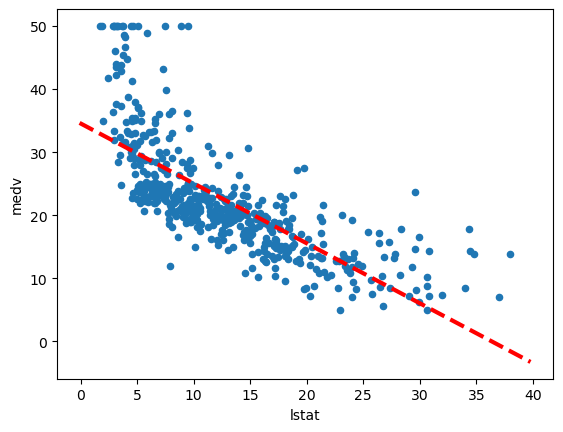

In [32]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax ,results.params [0],results.params [1],'r--',linewidth =3)

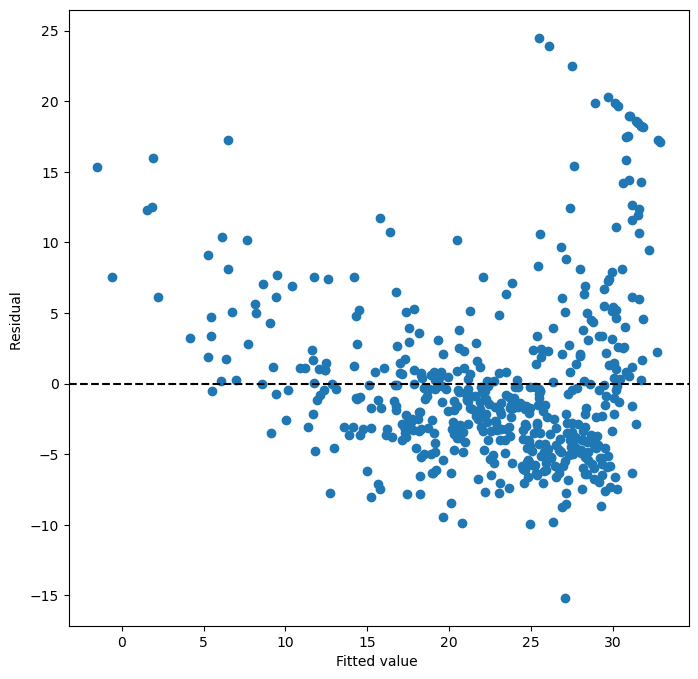

In [33]:
ax = subplots (figsize =(8 ,8))[1]
ax.scatter(results.fittedvalues , results.resid)
ax. set_xlabel ('Fitted value ')
ax. set_ylabel ('Residual ')
ax.axhline (0, c='k', ls='--');

np.int64(374)

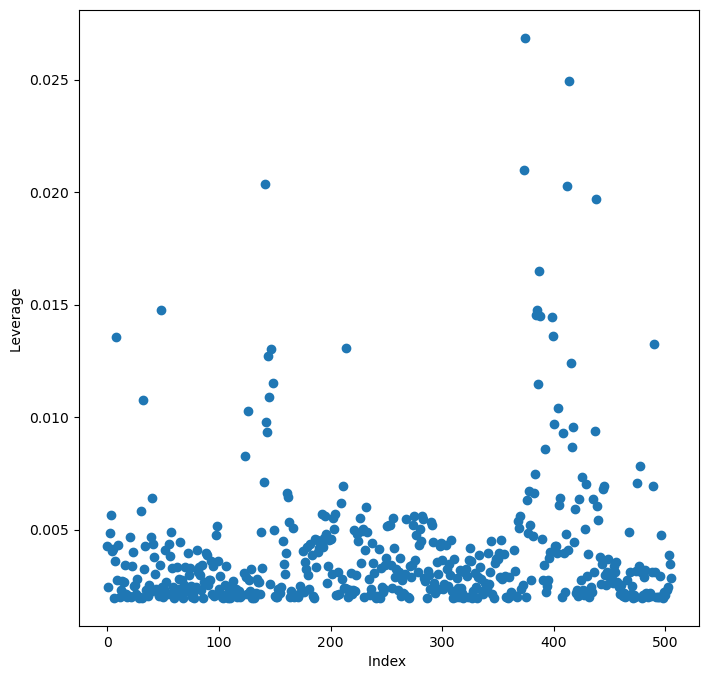

In [34]:
infl = results. get_influence ()
ax = subplots (figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape [0]) , infl. hat_matrix_diag )
ax. set_xlabel ('Index ')
ax. set_ylabel ('Leverage ')
np.argmax(infl. hat_matrix_diag )

## Multiple Linear Regression

In [37]:
X = MS(['lstat', 'age']). fit_transform (Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit ()
summarize ( results1 )

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [39]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [40]:
X = MS(terms). fit_transform (Boston)
model = sm.OLS(y, X)
results = model.fit ()
summarize (results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [42]:
minus_age = Boston.columns.drop (['medv', 'age'])
Xma = MS( minus_age ). fit_transform (Boston)
model1 = sm.OLS(y, Xma)
summarize (model1.fit ())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001
